# 신경망 적용

## 보스턴 주택 가격 예측
  - 13개의 특성 레이블은 주택 가격의 중간 가격($1000단위)    
    특성마다 나타내는 값이 다르므로 Strandardization 수행 Z-Normalization

In [5]:
from tensorflow.keras.datasets.boston_housing import load_data

(x_train, y_train),(x_test, y_test) = load_data(path='boston_housing.npz',
                                                test_split=0.2,
                                                seed = 777)

In [6]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(404, 13) (404,)
(102, 13) (102,)


In [11]:
import numpy as np
import pandas as pd
np.mean(x_train, axis = 1).shape

(404,)

In [18]:
# 데이터 표준화
mean = np.mean(x_train, axis = 0)
std = np.std(x_train, axis = 0)

x_train = (x_train - mean) / std
x_test = (x_test - mean) / std

from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                  test_size = 0.3,
                                                  random_state = 777)


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(64, activation = 'relu', input_shape = (13,)))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1)) # 회귀모델은 값 1개 activation 옵션 생략시 디폴트값은 linear

model.compile(optimizer = 'adam', loss = 'mse',
              metrics = ['mae']) # mae 평균절대값 오차

In [ ]:
history = model.fit(x_train, y_train, epochs =300,
                    validation_data = (x_val, y_val))
model.evaluate(x_test, y_test)

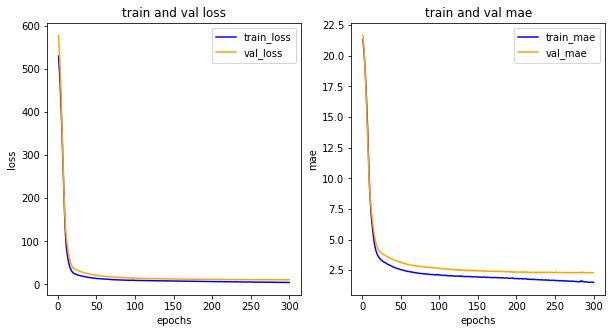

In [20]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss)+1)
fig = plt.figure(figsize = (10,5))
# 학습 및 검증 손실 그리기

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss , color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

mae = his_dict['mae']
val_mae = his_dict['val_mae']

# 학습 및 검증 정확도 그리기

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, color = 'blue', label = 'train_mae')
ax2.plot(epochs, val_mae, color = 'orange', label = 'val_mae')
ax2.set_title('train and val mae')
ax2.set_xlabel('epochs')
ax2.set_ylabel('mae')
ax2.legend()

## K-Fold
  - K-Fold Cross-Validation
    - K는 주로 3~10을 사용

In [21]:
from tensorflow.keras.datasets.boston_housing import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


(x_train, y_train),(x_test, y_test) = load_data(path='boston_housing.npz',
                                                test_split=0.2,
                                                seed = 777)
mean = np.mean(x_train, axis = 0)
std = np.std(x_train, axis = 0)

x_train = (x_train - mean) / std
x_test = (x_test - mean) / std

### KFold 정의

In [28]:
from sklearn.model_selection import KFold

k = 3
#주어진 데이터셋을 k만큼 등분
#k=3이므로 훈련 데이터셋을 3등분하여 1개는 검증 2개는 훈련
kfold = KFold(n_splits=k, random_state = 777, shuffle = True) # random_state 적용하기위해선 shuffle =True 필요함

#재사용을 위해 모델을 반환하는 함수를 정의

def get_model():
  model = Sequential()
  model.add(Dense(64, activation = 'relu', input_shape = (13,)))
  model.add(Dense(32, activation = 'relu'))
  model.add(Dense(1))

  model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])

  return model

mae_list = [] # 테스트셋을 평가한 후 결과 mae를 넣음

for train_index, val_index in kfold.split(x_train):
  # 인덱스는 무작위 생성으로 과대적합 피하는 방법
  x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
  y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

  model = get_model()

  model.fit(x_train_fold, y_train_fold, epochs = 300,
            validation_data = (x_val_fold, y_val_fold))
  test_mse, test_mae = model.evaluate(x_test, y_test)
  mae_list.append(test_mae)

Epoch 1/300
9/9 [==============================] - 1s 21ms/step - loss: 518.2388 - mae: 21.0639 - val_loss: 564.9415 - val_mae: 21.5585
Epoch 2/300
9/9 [==============================] - 0s 8ms/step - loss: 489.9028 - mae: 20.3856 - val_loss: 530.0604 - val_mae: 20.7770
Epoch 3/300
9/9 [==============================] - 0s 7ms/step - loss: 454.7037 - mae: 19.5416 - val_loss: 488.0566 - val_mae: 19.8019
Epoch 4/300
9/9 [==============================] - 0s 7ms/step - loss: 414.4568 - mae: 18.5215 - val_loss: 437.0834 - val_mae: 18.5585
Epoch 5/300
9/9 [==============================] - 0s 7ms/step - loss: 364.4377 - mae: 17.2225 - val_loss: 378.1295 - val_mae: 17.0097
Epoch 6/300
9/9 [==============================] - 0s 8ms/step - loss: 306.2014 - mae: 15.6143 - val_loss: 311.8367 - val_mae: 15.0750
Epoch 7/300
9/9 [==============================] - 0s 7ms/step - loss: 244.0030 - mae: 13.7530 - val_loss: 241.7369 - val_mae: 12.8213
Epoch 8/300
9/9 [==============================] - 0s 

In [30]:
print(f'전체 결과 : {mae_list}')
print(f'평균낸 결과를 최종 결과로 사용합니다. : {np.mean(mae_list)}')

전체 결과 : [2.218271255493164, 2.1420810222625732, 2.295738935470581]
평균낸 결과를 최종 결과로 사용합니다. : 2.2186970710754395
